In [19]:
! ls | grep .csv

ChurnData.csv
Cust_Segmentation.csv
FuelConsumption.csv
PriceRange.csv
cell_samples.csv
drug200.csv
teleCust1000t.csv


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
dataset = pd.read_csv("Cust_Segmentation.csv")

In [22]:
dataset

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [23]:
dataset.drop("Address",axis=1, inplace=True)

In [24]:
dataset

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


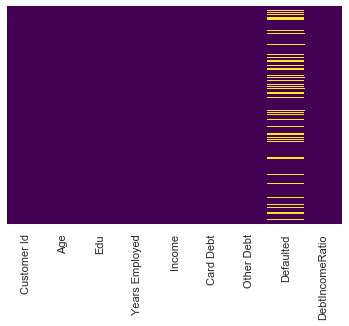

In [25]:
import seaborn as sns
sns.set()

sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False , cmap='viridis')

In [26]:
#dataset["Defaulted"] = dataset["Defaulted"].dropna
#sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False , cmap='viridis')

In [27]:
array = dataset.values
X = array[:,0:9]
X = np.nan_to_num(X)

In [28]:
X

array([[1.000e+00, 4.100e+01, 2.000e+00, ..., 1.073e+00, 0.000e+00,
        6.300e+00],
       [2.000e+00, 4.700e+01, 1.000e+00, ..., 8.218e+00, 0.000e+00,
        1.280e+01],
       [3.000e+00, 3.300e+01, 2.000e+00, ..., 5.802e+00, 1.000e+00,
        2.090e+01],
       ...,
       [8.480e+02, 2.500e+01, 4.000e+00, ..., 3.210e+00, 1.000e+00,
        3.340e+01],
       [8.490e+02, 3.200e+01, 1.000e+00, ..., 6.960e-01, 0.000e+00,
        2.900e+00],
       [8.500e+02, 5.200e+01, 1.000e+00, ..., 3.638e+00, 0.000e+00,
        8.600e+00]])

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
dataset_scaled = sc.fit_transform(X)
dataset_scaled

array([[-1.7300143 ,  0.74291541,  0.31212243, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [-1.72593888,  1.48949049, -0.76634938, ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-1.72186347, -0.25251804,  0.31212243, ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [ 1.72186347, -1.24795149,  2.46906604, ...,  0.03863257,
         1.90913822,  3.45892281],
       [ 1.72593888, -0.37694723, -0.76634938, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 1.7300143 ,  2.1116364 , -0.76634938, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [31]:
from sklearn.cluster import KMeans 
KMeans_model = KMeans(init = "k-means++", n_clusters=3, n_init=12)
KMeans_model.fit(dataset_scaled)
labels = KMeans_model.labels_

print(labels)

[1 2 0 1 2 2 1 1 1 2 0 1 1 1 0 1 1 1 2 1 1 1 0 2 2 1 1 1 1 1 1 2 0 1 1 1 0
 0 1 2 0 2 1 2 1 2 1 1 1 1 2 2 0 1 0 0 0 1 1 1 2 1 2 2 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 2 1 1 0 2 1 2 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 2 1 0 0 2 1 1 1 1 1
 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 2 1 1 0
 1 1 1 2 0 1 1 1 1 2 0 0 1 2 1 1 1 1 1 1 1 1 2 1 1 0 1 0 1 1 0 2 0 1 1 2 0
 2 1 1 1 1 1 2 1 0 1 1 1 2 2 1 2 1 0 1 1 0 1 2 1 0 1 1 1 1 1 0 0 2 1 1 0 2
 1 1 1 1 2 1 1 0 1 1 1 1 2 1 1 0 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 0 1 0 1
 1 1 2 1 0 2 0 1 2 1 1 0 1 1 1 1 0 0 0 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 0 1 1
 0 1 0 2 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 2 1 0 1 1 1 0 0 1 1 1 2 0
 1 1 0 1 2 1 1 1 1 1 0 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 0 1 0 1 1 1 2 2 1
 0 1 2 0 0 1 1 1 0 1 1 1 1 1 2 1 2 1 1 1 1 0 1 0 1 1 1 2 1 1 1 1 0 1 1 0 0
 2 1 1 1 1 1 0 0 1 2 0 2 1 1 0 1 1 2 2 1 0 1 1 2 1 0 1 2 1 1 1 2 1 1 1 1 2
 1 0 1 1 1 1 2 0 1 1 2 1 0 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1 0 1 1 1 0 1
 0 1 1 1 1 1 2 0 0 1 2 1 

In [34]:
dataset.drop("Clus_km", axis=1, inplace=True)

In [39]:
dataset.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Output
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
5,6,40,1,23,81,0.998,7.831,NaN,10.9,2
6,7,38,2,4,56,0.442,0.454,0.0,1.6,1
7,8,42,3,0,64,0.279,3.945,0.0,6.6,1
8,9,26,1,5,18,0.575,2.215,NaN,15.5,1
9,10,47,3,23,115,0.653,3.947,0.0,4.0,2


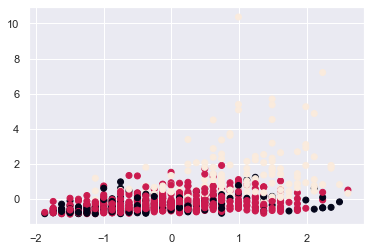

In [52]:
plt.scatter(dataset_scaled[:, 1], dataset_scaled[:, 4], c=dataset["Output"])